<a href="https://colab.research.google.com/github/sadovnichek/NumericCalculus/blob/main/ShotMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import math
import matplotlib.pyplot as plt

def right(x, y):
  return y

In [99]:
def euler_recount(x, y, h, f):
  next_x = x + h
  next_y = y + h / 2 * (f(x, y) + f(next_x, y + h * f(x, y)))
  return (next_x, next_y)

In [100]:
def shot(a, b, mu, m):
  def dy_mu(x, y):
    return 1 / 2 * (math.exp(x) - math.exp(-x))
  x_values, z_values = cauchy_problem(euler_recount, a, b, mu, m, dy_mu)
  def z(x, y):
    i = x_values.index(x)
    return z_values[i]
  return cauchy_problem(euler_recount, a, b, 0, m, z)


In [101]:
def cauchy_problem(method, a, b, alpha, m, f):
  h = (b - a) / m
  x_values = [a]
  y_values = [alpha]
  for i in range(1, m + 1):
    x, y = method(x_values[-1], y_values[-1], h, f)
    x_values.append(x)
    y_values.append(y)
  return (x_values, y_values)

In [102]:
def draw(method=euler_recount):
  x_values, y_values = shot(0, 1, 0.851, 10)
  y_values = list(map(lambda y: round(y, 4), y_values))

  plt.grid()
  plt.plot(x_values, y_values, '-bo')
  plt.show()

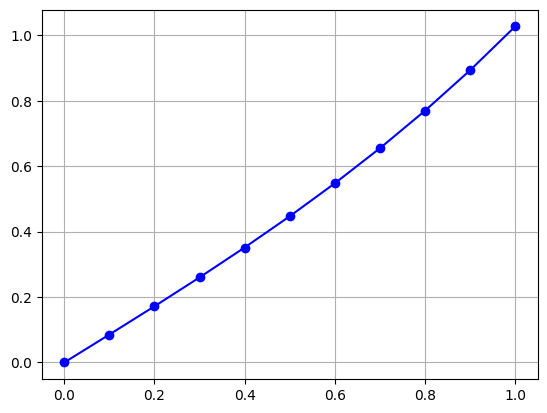

In [103]:
draw()